# Machine learning program "Median House Value"


In [120]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

print("Tensorflow version: "+tf.__version__)

Tensorflow version: 2.14.0


## Datasets

In [121]:
ATT_FILE =   f"MedianHouseValuePreparedCleanAttributes.csv"
LABEL_FILE = f"MedianHouseValueOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)
label =      pd.read_csv(LABEL_FILE)

In [69]:
attributes.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.217131,-0.693943,0.411765,-0.939264,-0.887337,-0.909246,-0.892781,-0.775851,-1.000000
1,-0.693227,0.177471,-0.294118,-0.917951,-0.886716,-0.954483,-0.889492,-0.591592,1.000000
2,0.448207,-0.959617,0.372549,-0.830663,-0.800745,-0.893495,-0.795757,-0.558972,1.000000
3,0.290837,-0.708820,-0.411765,-0.876291,-0.859094,-0.943160,-0.843776,-0.487055,-1.000000
4,-0.400398,0.158342,-0.490196,-0.841854,-0.845748,-0.934135,-0.827660,-0.164687,-0.333333


In [70]:
label.head()

,"Cheap:[15.0, 141.3]","Averaged:[141.4, 230.2]","Expensive:[230.3, 500.0]"
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [124]:
TRAIN_RATIO = 0.8

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATIO)
n_dev = int((n_instances - n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]
x_dev =   attributes.values[n_train:n_train + n_dev]
t_dev =   label.values[n_train:n_train + n_dev]

INPUTS =  x_train.shape[1]
OUTPUTS = t_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES =      int(round(x_dev.shape[0]/1))

print ("Number of training examples: ", NUM_TRAINING_EXAMPLES)
print ("Number of examples for development test: ", NUM_DEV_EXAMPLES)

Number of training examples:  16342
Number of examples for development test:  2043


## Model


In [125]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

In [126]:
model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

In [127]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              metrics=["categorical_accuracy"])


## Training

In [128]:
n_epochs = 1000
batch_size = 512
start_time = time.perf_counter()

In [129]:
history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs=n_epochs,
                    verbose = 0,
                    validation_data = (x_dev, t_dev))

## Results

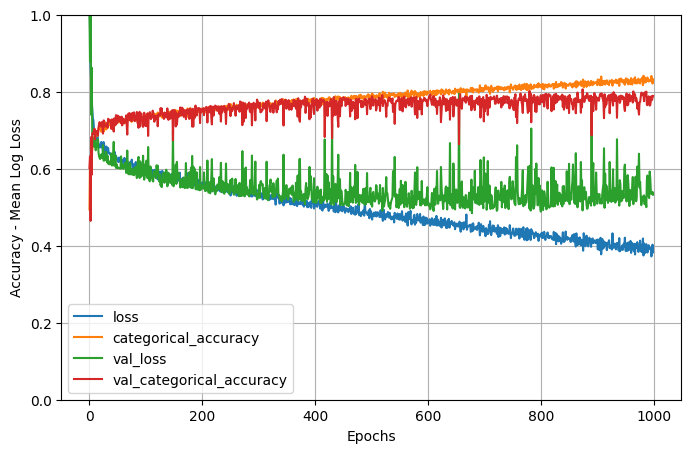

In [130]:
results = pd.DataFrame(history.history)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

In [131]:
print ("Error (training): ",
       round((1 - results.categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Error (development test): ",
       round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Time: ",
       round((time.perf_counter() - start_time)),"seconds")

Error (training):  16.8 %
Error (development test):  21.1 %
Time:  422 seconds


## **Exercises**

### **Exercise 1.**
Performance evaluation  Determine the following values: train error, test error (using dev set), bias, variance and training time. Repeat the execution at least three times. Consider 5% as Bayesian error (human error).

In [132]:
human_error = 5
train_errors = [17.7, 9.5, 2.5]
test_errors = [20.2, 21.0, 20.9]
training_times = [203, 1660, 155]
bias = [ e - human_error for e in train_errors]
variance = [e - train_errors[i] for i, e in enumerate(test_errors)]

data = {
    "train error" : train_errors,
    "test error": test_errors,
    "bias":bias,
    "variance":variance,
    'training time (s)': training_times
    }

values = pd.DataFrame(data)
values

,train error,test error,bias,variance,training time (s)
0,17.7,20.2,12.7,2.5,203
1,9.5,21.0,4.5,11.5,1660
2,2.5,20.9,-2.5,18.4,155


### **Exercise 2:**
Changing basic hyperparameters  Change hyperparameters related to: batch size, number of layers, and number of neurons. Estimate train error, test error, bias, variance and training time. Consider 5% as Bayesian error (human error).

#### **Change the batch size**

In [137]:
import glob
import pickle

class ResultsModel:

  def save_result(self,file_name, data):
    if not isinstance(data, dict):
        raise Exception("Data is not a dictionary")
    with open(file_name, 'wb') as fp:
        pickle.dump(data, fp)

  def get_result(self, file_name):
    with open(file_name, 'rb') as fp:
        data = pickle.load(fp)
        return data

  def calculate_parameters(self,file_name):
    data = self.get_result(file_name)
    results = pd.DataFrame(data['history'])
    total_time = data['total_time']
    batch_size = data['batch_size']
    n_epochs = data.get('n_epochs', 1000)
    train_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 1)
    test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 1)
    bias = train_error - human_error
    variance = test_error - train_error
    iterations = (n_train/batch_size) *n_epochs

    parameters_calculated = {
      "batch size": batch_size,
      "N":iterations,
      "train error" : train_error,
      "test error": test_error,
      "bias":bias,
      "variance":variance,
      'training time (s)': total_time,
      'results': results
    }

    return parameters_calculated


  def get_all_logs_names(self, prefix):
    file_names = glob.glob(f'{prefix}*')
    return file_names

  def get_all_results(self, prefix):
    self.results = list()
    for log_name in self.get_all_logs_names(prefix):
      self.results.append(self.calculate_parameters(log_name))

    data = {
          "batch size": [r['batch size'] for r in self.results],
          "N":[r['N'] for r in self.results],
          "train error" : [r['train error'] for r in self.results],
          "test error": [r['test error'] for r in self.results],
          "bias":[r['bias'] for r in self.results],
          "variance":[r['variance'] for r in self.results],
          'training time (s)': [r['training time (s)'] for r in self.results]
          }

    values = pd.DataFrame(data)
    return values.sort_values(by=['batch size'], ascending=False)


,batch size,N,train error,test error,bias,variance,training time (s)
1,16342,1.000000,15.2,20.5,10.2,5.3,0
0,8192,1.994873,14.9,20.9,9.9,6.0,0
7,4096,3.989746,15.3,20.6,10.3,5.3,0
5,2048,7.979492,15.8,20.4,10.8,4.6,0
6,1024,15.958984,15.6,24.5,10.6,8.9,0
2,512,31.917969,16.2,20.5,11.2,4.3,1
4,256,63.835938,17.2,21.9,12.2,4.7,1
8,128,127.671875,19.3,23.3,14.3,4.0,2
3,64,255.343750,21.9,32.3,16.9,10.4,3


In [138]:
n_epochs = 1000
batch_sizes = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16342]

h = ResultsModel()

def calc_time(start_time):
  total_time = round((time.perf_counter() - start_time))
  return total_time

data = dict()

for batch_size in batch_sizes:
  start_time = time.perf_counter()

  history = model.fit(x_train, t_train,
                      batch_size = batch_size,
                      epochs=n_epochs,
                      verbose = 0,
                      validation_data = (x_dev, t_dev))

  total_time = calc_time(start_time)

  data = {
   'history': history.history,
   'batch_size': batch_size,
   'total_time': total_time,
   'n_epochs': n_epochs
  }
  h.save_result(f"batch_size_{batch_size}", data)



In [ ]:
results_model = ResultsModel()
results_model.get_all_results('batch_size_')
# index = 2
# print(results_model.results[index]['results'].categorical_accuracy)
# print(results_model.results[index]['batch size'])
# print(round((1 - results_model.results[0]['results'].val_categorical_accuracy.values[-1:][0])*100, 1))